In [157]:
import pandas as pd
import numpy as np
import folium
import json
import glob
from geojson import Point, Feature, FeatureCollection, dump

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline
import plotly.graph_objects as go

In [111]:
sns.set_context("poster") 
plt.style.use('seaborn-poster')

In [112]:
# !pip install geojson
# !pip install folium
# !pip install plotly

In [186]:
geofiles = glob.glob('GeoJSON files/*.geojson')
print(len(geofiles))
geofiles

20


['GeoJSON files\\all_parks.geojson',
 'GeoJSON files\\amstelpark.geojson',
 'GeoJSON files\\beatrixpark.geojson',
 'GeoJSON files\\erasmuspark.geojson',
 'GeoJSON files\\flevopark.geojson',
 'GeoJSON files\\gaasperpark.geojson',
 'GeoJSON files\\nelsonmandelapark.geojson',
 'GeoJSON files\\noorderpark.geojson',
 'GeoJSON files\\oosterpark.geojson',
 'GeoJSON files\\sarphatipark.geojson',
 'GeoJSON files\\sloterpark.geojson',
 'GeoJSON files\\vondelpark_oost1.geojson',
 'GeoJSON files\\vondelpark_oost2.geojson',
 'GeoJSON files\\vondelpark_oost3.geojson',
 'GeoJSON files\\vondelpark_west.geojson',
 'GeoJSON files\\westerpark_centrum.geojson',
 'GeoJSON files\\westerpark_gasfabriek.geojson',
 'GeoJSON files\\westerpark_oost.geojson',
 'GeoJSON files\\westerpark_west.geojson',
 'GeoJSON files\\whvliegenbos.geojson']

In [193]:
d = {}
for file in geofiles:
    with open(file) as f:
        geo = json.load(f)
    d[file.split('.')[0][14:]] = geo
    
geos = list(d.keys())

In [194]:
locations = ['Sarphatipark',
 'Vondelpark West',
 'Vondelpark Oost 3',
 'Vondelpark Oost 2',
 'Vondelpark Oost 1',
 'Oosterpark',
 'Erasmuspark',
 'Westerpark Oost',
 'Westerpark Centrum',
 'Westergasfabriek',
 'Westerpark West']


visits = [50, 20, 40, 60, 34, 90, 120, 23, 45, 78, 34, 13, 130]

data = pd.DataFrame(list(zip(locations, visits)),
               columns =['Location', 'Visitors'])
data

,Location,Visitors
0,Sarphatipark,50
1,Vondelpark West,20
2,Vondelpark Oost 3,40
3,Vondelpark Oost 2,60
4,Vondelpark Oost 1,34
5,Oosterpark,90
6,Erasmuspark,120
7,Westerpark Oost,23
8,Westerpark Centrum,45
9,Westergasfabriek,78


In [195]:
def create_plot(data):
    plt.plot(data['Visitors'], label='Visitors') 
    plt.xlabel('Location') 
    plt.ylabel('Visitors') 
    plt.legend(loc='lower right', prop={'size': 10}) 
#     plt.savefig(file_name)
    plt.show()

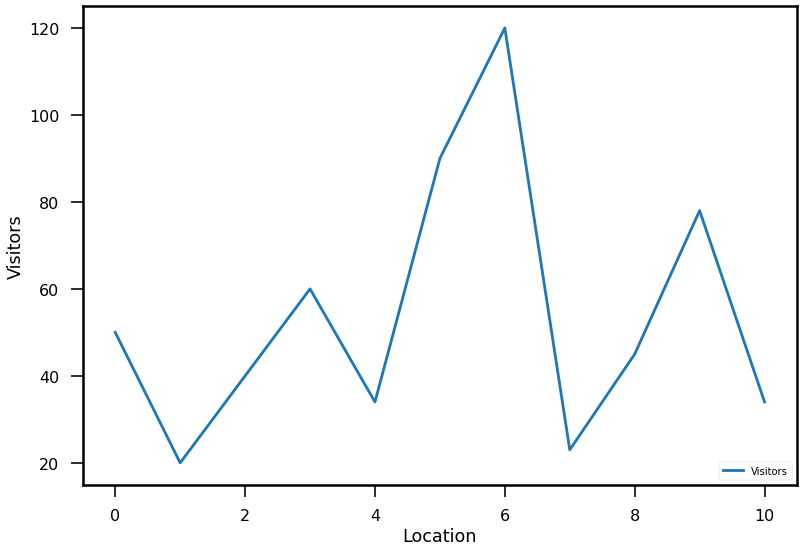

In [196]:
create_plot(data)

In [197]:
def get_html(name, url, width, height):
    html = f'''
        <html>
            <body>
                <h1>{name}</h1><br>
                <iframe id={name} width={width} height={height} src={url} frameborder="0">
                    <p>Your browser does not support iframes.</p>
                </iframe>
            </body>
        </html>'''
    return html

In [198]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.0, 
                            'weight': 0.5}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.5, 
                                'weight': 0.5}

m = folium.Map(
    location=[52.377956, 4.897070],
    tiles="cartodbpositron",
    zoom_start=13,
)

chor = folium.Choropleth(
    geo_data=d['all_parks'],
    name="choropleth",
    data=data,
    columns=["Location", "Visitors"],
    key_on="properties.Naam",
    bins=6,
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.7,
    legend_name="Visitors",
    highlight=True,
)

chor.add_to(m)

fgp = folium.FeatureGroup(name="Parks")

for park in geos:
    g = d[park]
    gjson = folium.GeoJson(g, 
                           name="City Parks",
                           style_function=style_function,
                           highlight_function=highlight_function,
                          )
    
    name = g['features'][0]['properties']['Naam']
    html = get_html(name, 'temp-plot.html', 500, 500)
    test = folium.Html(html, script=True)
    popup = folium.Popup(test, max_width=2650)
    gjson.add_child(popup)
    
    fgp.add_child(gjson)
    
fgp.add_to(m)
folium.LayerControl().add_to(m)

# folium.features.GeoJsonPopup(fields=['Naam'], labels=False).add_to(gjson)

In [199]:
m